# Proyecto de Programación en Python: Gestión de Tele-Com

## Autor: Diego Candela Salomón

### A1 Carga de datos

Antes de empezar, estos son las librerías e imports que tendremos que tener instaladas para poder ejecutar todo el código:

In [1]:
import string
import numpy as np
import urllib.request
from nltk.corpus import stopwords
import pandas as pd
from bs4 import BeautifulSoup


#### 1.a
Lo primero que requiere el ejercicio es leer el fichero clientes 'pibpc.txt' del que nos piden que obtengamos un diccionario asociando el número entero de clientes a cada país. Cada país estará representado por una letra del alfabeto. 

In [2]:
def create_dictionary_agenda():
    #llamaremos al diccionario agenda.
    agenda = {}
    #abrimos el archivo clientes_pibpc.txt
    fClientes = open('clientes_pibpc.txt', 'r')
    #la primera linea del archivo la llamamos num_clientes y la segunda renta
    num_clientes = fClientes.readline().split()
    renta_pc = fClientes.readline().split()
    fClientes.close()
    #como medida para asegurarnos de que las dimensiones del diccionario se mantienen
    longitud_renta_pc = len(renta_pc)
    longitud_num_clientes = len(num_clientes)
    #esta es una medida para controlar que las dimensiones de agenda son las correctas
    if longitud_num_clientes != longitud_renta_pc:
        print('esto no está bien')
        quit()
    #definimos el diccionario como agenda
    #tenemos que llamar al conjunto de letras mayúsculas
    letras = list(string.ascii_uppercase)
    #establecemos un bucle de forma que acada letra mayúscula le
    #corresponda un dato del array resultante del primer split.
    for i in range(longitud_num_clientes):
        agenda[letras[i]] ={
            int(num_clientes[i])
            }
    return agenda


#### 1.b
La segunda parte del ejercicio nos pide generar un diccionario que asocie las letras empleadas en el diccionario anterior (agenda) con los países correspondientes:

In [4]:
#generamos un diccionario que llamaremos paises
paises = {}
#definimos la función para llenar el diccionario con el contenido del archivo de texto paises.txt
def create_dictionary_countries():
    #volvemos a llamar al conjunto de letras mayúsculas como en el ejercicio anterior.
    letras = list(string.ascii_uppercase)
    # abrimos el archivo paises.txt en modo lectura
    fPaises = open('paises.txt', 'r')
    i = 0
    #con este bucle para cada linea en el archivo paises asociamos una letra
    for linea in fPaises:
        paises[letras[i]] = linea.strip()
        i = i+1
    fPaises.close()

### A2 Generación de los códigos de los clientes
#### 2.a
El objetivo del apartado 2 es generar un código con la letra de un país seguido de cuatro dígitos en función de las poblaciones de cada país. 

Nos piden que diseñemos dos funciones aleatorias:
la primera función para generar la letra de un país en función de la cantidad de clientes de ese país (a mayor número de clientes, mayor probabilidad)

In [ ]:
def getPais(): 
"""
Función que genera una letra aleatoria asociada a cada país proveniente del diccionario 'agenda'
Return
------
str
una letra aleatoria dentro del diccionario 'agenda'
Example
-------
>>> getPais()
'A'
"""
    # definimos la lista de las letras en mayúscula
    letras = list(string.ascii_uppercase)
    # establecemos el total de clientes a 0
    totalClientes = 0    
    # definimos un bucle de i hasta el final de los elementos de agenda
    for i in range(len(agenda)):
        #para conseguir que el valor asociado a la letra en Agenda vuelva como 
        #int es necesario convertirlo en lista llamando al primer elemento
        totalClientes = totalClientes + list(agenda[letras[i]])[0]
    #por la misma razón de los int definimos las listas de elements y probabilities
    elements = list()
    probabilities = list()
    #definimos el siguiente bucle para construir el cálculo de probabilidad una 
    #vez sabemos el numero de clientes asociado a la letra y por tanto el peso se obtiene de ambas.
    for i in range(len(agenda)):
        elements.append(letras[i])
        probabilities.append(list(agenda[letras[i]])[0]/totalClientes)
    #como no almacena en la memoria el replacement, no importa ponerlo como True
    # o False.
    return np.random.choice(elements, 1, True, probabilities)[0] 

#### 2.b
la segunda función que nos piden ha de generar un número natural entre 0 y n y reemplazar un string de cuatro dígitos "0000".

In [ ]:
def getCodigo(letraPais: str):
"""
Función que genera un código de cuatro dígitos cuyo máximo es distinto en función de la 
cantidad de clientes que hay en cada país.
Parameters
----------
letraPais: str
el código de 4 dígitos para la letra del país introducida
Return
------
str
un código de cuatro dígitos 
Example
-------
>>> getCodigo('A')
'0048'
"""
    #obtenemos el valor máximo del código introduciendo la letra en agenda
    setNumero = agenda[letraPais]
    #lo pasamos a lista para poder acceder al entero
    listaNumero = list(setNumero)
    #pedimos solamente el primer y único elemento
    elementoListaNumero = listaNumero[0]
    #calculamos el numero aleatorio con el rango establecido por el máximo
    #valor que es el número de clientes - 1 para cada letra..
    numero = np.random.choice(range(elementoListaNumero), 1)[0]
    numero = str(numero)
    #establecemos un código de 4 "0000" y reemplazamos por el número del código.
    numero = numero.zfill(4)
    return numero

#### 2.c
Por último, hemos de unir ambas funciones en una sola para generar los códigos de cliente

In [ ]:
def clienteAleatorio():
"""
Función que genera un código de cuatro dígitos cuyo máximo es distinto en función de la 
cantidad de clientes que hay en cada país.
Parameters
----------
letraPais: str
el código de 4 dígitos para la letra del país introducida
Return
------
str
un código de cuatro dígitos 
Example
-------
>>> getCodigo('A')
'0048'
"""
    letra_pais = getPais()
    return (letra_pais + '-' + getCodigo(letra_pais))

### A3 Generación del contenido de un mensaje
Para esta parte de la tarea hemos de generar palabras significativas y ser capaces de unirlas en formas de mensaje. Para ellos tendremos que construir una serie de funciones previas
#### 3.a
La primera parte de esta tarea consiste en descargar un archivo que contenga las palabras más usadas del castellano y el valor de la frecuencia de uso. 

In [ ]:
def get_archivo(link):
"""
Función que descarga un archivo .txt a partir de una url y extrae las lineas de texto para procesarlas
Parameters
----------
link: url
una url de la que obtener la lista de palabras
'http://corpus.rae.es/frec/1000_formas.TXT'
Return
------
list
una lista de palabras y frecuencias 
Example
-------
>>> get_archivo('http://corpus.rae.es/frec/1000_formas.TXT')
>>> lineas[1:5]
['     1.\tde\t9,999,518 \t 65545.55 ',
 '     2.\tla\t6,277,560 \t 41148.59 ',
 '     3.\tque \t4,681,839 \t 30688.85 ',
 '     4.\tel\t4,569,652 \t 29953.48 ']

"""  
    archivo = urllib.request.urlopen(link)
    con_etiquetas = archivo.read()
    texto_limpio = BeautifulSoup(con_etiquetas, "lxml")
    texto = texto_limpio.get_text(strip=True)
    lineas = texto.splitlines()
    return lineas

#### 3.b & c
una vez tenemos almacenada la lista de palabras hemos de eliminar las palabras que no sean significativas (véase el conjunto de preposiciones) o stopwords. Para ello la función que vamos a crear ha de eliminar esas palabras de la lista que hemos obtenido previamente. Con esto, habremos obtenido nuestro "corpus" que almacenaremos en el archivo "corpus.txt". La lista ya está ordenada para su posterior uso en el siguiente apartado.

In [ ]:
def print_corpus_to_file(lineas):
"""
Función que genera el archivo corpus.txt a partir del primer procesado del texto "lineas"
Parameters
----------
lineas: list
la lista obtenida de palabras 
Return
------
txt file
un archivo corpus.txt en el que se omiten las stopwords.
Example
-------
>>> print_corpus_to_file(lineas)

""" 
    #abrimos la lista de palabras
    palabras = list()
    #abrimos el archivo corpus.txt en modo escritura
    file = open("corpus.txt", "w")
    #establecemos el encabezado del archivo
    file.write("Palabras\t")
    file.write("Frecuencias\t")
    file.write("\n")
    #definimos el conjunto de palabras stopwords que eliminaremos para formar el corpus
    out_espannol = stopwords.words('spanish')
    #bucle de seguridad
    for i in range(1,len(lineas)):
        if len(palabras) == 500:
            break
        #al analizar cada linea, si la palabra que hay en la linea está en el conjunto
        #de palabras stopwords, la eliminamos. Si no, se escribe directamente en el texto.
        linea = lineas[i].split("\t")
        palabra_candidata = linea[1].split()[0]
        if palabra_candidata in out_espannol:
            continue
        #se escribe la palabra junto su frecuencia en el texto. Esta parte del código es
        #cortesía de Ángel Rodríguez.
        palabras.append(palabra_candidata)
        file.write("%s\t" % palabra_candidata)
        file.write("%s\t" % linea[3])
        file.write("\n")
    file.close()

#### 3.d
Por último necesitamos una función que nos devuelva una lista de n palabras en función de su frecuencia de uso en el castellano para lo que usaremos la misma lista lineas dado que ya está ordenada

In [ ]:
def random_word_corpus_generator(lineas, number_of_words = 10):
"""
Función que devuelve una lista de n palabras del corpus que hemos diseñado previamente.
A mayor frecuencia de uso, mayor probabilidad de que la función devuelva esa palabra
Parameters
----------
lineas: list
la lista obtenida de palabras 
number_of_words = 10: int
el número de palabras que se desean. el default se establece en 10.
Return
------
list
una lista conteniendo n palabras provenientes del corpus
Example
-------
>>> random_word_corpus_generator(lineas, number_of_words = 10)
['educación',
 'obra',
 'largo',
 'aquellos',
 'diez',
 'pasar',
 'camino',
 'parte',
 'crisis',
 'jóvenes']

""" 
    #el procedimiento del código es el mismo que en el anterior ejercicio
    palabras = list()
    frecuencias = list()
    out_espannol = stopwords.words('spanish')
    for i in range(1,len(lineas)):
        if len(palabras) == 500:
            break
        linea = lineas[i].split("\t")
        palabra_candidata = linea[1].split()[0]
        if palabra_candidata in out_espannol:
            continue
        palabras.append(palabra_candidata)
        #excepto por esta parte. Ahora acumulamos las frecuencias de cada palabra
        frecuencias.append(float(linea[3]))
    total_frecuencias = sum(frecuencias)
    #porque al final nos interesa calcular de la frecuencia particular de la palabra
    #sobre el total de frecuencias acumuladas para poder hacer el cálculo.
    probabilidad = [x/total_frecuencias for x in frecuencias]
    return list(np.random.choice(palabras, number_of_words, False, probabilidad))

### A4 Generación de la colección de mensajes
#### A.4
En este apartado de la tarea debemos generar una colección de mensajes a partir de las funciones que ya hemos desarrollado. El archivo de texto tendrá una disposición csv separada por almohadillas (#). 

'E-0027'  #  'A-0211'  #  dos muerte aquel justicia actividades sociedad

In [ ]:
def create_messages_txt():
"""
Función que imprime 5000 mensajes como el ejemplo indicado en el enunciado. La cantidad de 
palabras contenida en el mensaje varía entre 3 y 12 (parámetros establecidos aleatoriamente)
Return
------
txt file
un archivo de texto compuesto de 50000 mensajes.
Example
-------
>>> create_messages_txt()
""" 
    #abrimos el archivo mensajes_muestra.txt en modo escritura
    file = open("mensajes_muestra.txt", "w")
    #establecemos un bucle. Para cada iteración escribimos una linea con dos códigos aleatorios
    for i in range(0,5000):
        file.write(clienteAleatorio() + "  #  " + clienteAleatorio() + "  #  ")
        #abrimos un segundo bucle que a partir de una lista de 12 palabras significativas
        #escribe de 3 a 12
        palabras_mensaje = random_word_corpus_generator(lineas, 12)
        for j in range(0,np.random.randint(3,12)):
            file.write((palabras_mensaje[j] + " "))
        file.write("\n")
    file.close()

### B1 Contabilidad: totalización de palabras entre cada dos países
#### B1.5
La primera función de este apartado requiere que leamos el archivo mensajes_muestra.txt y almacenemos cada linea en un dataframe para luego obtener la información que nos interesa: pais emisor, país receptor y cantidad de palabras en el mensaje.

In [ ]:
def create_df_messages_mal(): 
"""
Función que crea un dataframe de 6 columnas. En las tres primeras almacena el contenido íntegro
del mensaje (los dos códigos y el mensaje). En las tres últimas columnas almacena el código
del país emisor, receptor y la cantidad de palabras del mensaje.
Return
------
dataframe
dataframe de 5000 lineas y 6 columnas
Example
-------
>>> create_df_messages_mal()
""" 
    #declaramos una lista para cada columna del dataframe
    pais_emisor=list()
    pais_receptor=list()
    palabras_mensaje=list()
    pais1=list()
    pais2=list()
    cantidad_palabras=list()
    #abrimos el archivo mensajes_muestra.txt en modo lectura
    file = open("mensajes_muestra.txt", "r")
    linea = file.readline() # leo la primera linea
    while len(linea) > 2: # mientras que la linea contenga texto (no este vacia)
        lineaSep = linea.split("#") # separo pais, pais, palabras
        if len(lineaSep) < 3: # por si la linea esta mal, para no acceder a posiciones prohibidas
            print('ahi va la hostia')
            print(lineaSep)
            break
        #para cada linea obtenemos esta información
        pais_emisor.append(lineaSep[0].strip()) 
        pais_receptor.append(lineaSep[1].strip())
        palabras_mensaje.append(lineaSep[2].strip())
        pais1.append(lineaSep[0].strip()[0]) 
        pais2.append(lineaSep[1].strip()[0])
        palabras_sucio = lineaSep[2].split(" ")
        palabras_limpias = list()
        for palabra_candidata in palabras_sucio:
            #nos aseguramos de que la palabra_candidata sea una palabra y no un espacio o símbolo
            if palabra_candidata != '' and palabra_candidata != '\n':
                palabras_limpias.append(palabra_candidata)
        cantidad_palabras.append(len(palabras_limpias))
        linea = file.readline() # leemos la siguiente linea
        #agrupamos los datos para imprimirlos luego en el dataframe
    data=list(zip(pais_emisor,pais_receptor,palabras_mensaje, pais1, pais2, cantidad_palabras))
    print(pd.DataFrame(data, columns = ['codigo_emisor', 'codigo_receptor', 'palabras_mensaje', 'pais_emisor', 'pais_reeptor', 'cantidad_palabras']))


#### B1.6
el siguiente dataframe contiene solo la información de las tres últimas columnas del dataframe anterior. De cada linea extraemos los datos y los almacenamos en el mismo dataframe para posteriormente procesarlos en un diccionario. 

In [ ]:
def create_df_messages_bien():
"""
Función que crea un dataframe de 3 columnas almacenando el código
del país emisor, receptor y la cantidad de palabras del mensaje.
Return
------
dataframe
dataframe de 5000 lineas y 3 columnas
Example
-------
>>> create_df_messages_bien()
"""
    pais1=list()
    pais2=list()
    cantidad_palabras=list()
    file = open("mensajes_muestra.txt", "r")
    linea = file.readline() # leo la primera linea
    while len(linea) > 2: # mientras que la linea contenga texto (no este vacia)
        lineaSep = linea.split("#") # separo pais, pais, palabras
        if len(lineaSep) < 3: # por si la linea esta mal, para no acceder a posiciones prohibidas
            print('ahi va la hostia')
            print(lineaSep)
            break
        pais1.append(lineaSep[0].strip()[0]) 
        pais2.append(lineaSep[1].strip()[0])
        palabras_sucio = lineaSep[2].split(" ")
        palabras_limpias = list()
        for palabra_candidata in palabras_sucio:
            if palabra_candidata != '' and palabra_candidata != '\n':
                palabras_limpias.append(palabra_candidata)
        cantidad_palabras.append(len(palabras_limpias))
        linea = file.readline() # leemos la siguiente linea
    data=list(zip(pais1,pais2,cantidad_palabras))
    dfmessages = pd.DataFrame(data, columns = ['pais_emisor', 'pais_receptor', 'cantidad_palabras'])
    return dfmessages

#### B1.7 map/reduce
lamentablemente no conseguí entender el planteamienteo map/reduce por mí mismo. Razón por la que no lo incluyo en esta entrega.

### B2 Asuntos económicos: balance de ingresos
#### B2.8a
En esta parte de la tarea hemos de generar una función que lea el archivo de texto clientes_pibpc.txt para generar una matriz de 5x5 donde almacenemos las tarifas para posteriormente almacenar esa matriz en otro archivo de texto tarifas.txt

In [ ]:
def create_matrix_tarifas():
"""
función que crea una matriz de 5x5 calculando las tarifas a partir del archivo de texto
clientes_pibpc.txt
Returns
------
np.array.dataframe
matriz de 5x5
txt file
tarifas.txt
Example
-------
>>> create_matrix_tarifas()
array([[0.086, 0.086, 0.086, 0.086, 0.086],
       [0.034, 0.034, 0.034, 0.034, 0.034],
       [0.115, 0.115, 0.115, 0.115, 0.115],
       [0.069, 0.069, 0.069, 0.069, 0.069],
       [0.188, 0.188, 0.188, 0.188, 0.188]])
"""
    #declaramos la matriz que vamos a rellenar
    matrix_tarifas = np.zeros((len(agenda), len(agenda)))
    #abrimos el fichero de texto en modo lectura
    fClientes = open('clientes_pibpc.txt', 'r')
    #declaramos los nombres de cada linea
    num_clientes = fClientes.readline().split()
    renta_pc = fClientes.readline().split()
    #calculamos las tarifas a partir de este bucle
    for i in range(len(num_clientes)):    
       matrix_tarifas [i,:] = round((float(num_clientes[i])/float(renta_pc[i]) * 10), ndigits = 3)
    return matrix_tarifas 

tarifas = create_matrix_tarifas()
#creamos un archivo de texto tarifas.txt en modo escritura
file_tarifas = open('tarifas.txt', 'w')
#numpy tiene una función propia para almacenar los valores
np.savetxt('tarifas.txt', tarifas, delimiter=',')
file_tarifas.close()
print('archivo tarifas.txt creado con éxito')

#### B2.8b
la segunda parte de este apartado requiere de varias funciones para en última instancia calcular una nueva matriz con la cantidad de mensajes entre paises (pais emisor-país receptor) y luego multiplicarla por la matriz de tarifas. Para construirla primero almacenamos en un diccionario el contenido del dataframe generado con los mensajes en el apartado anterior

In [ ]:
def create_matrix(dataframe):
"""
función que crea un diccionario con los mensajes entre países para volcarlos posteriormente en
una matriz
Input
------
dataframe:np.array.dataframe
un dataframe generado a partir de la función create_dataframe_bien()
Returns
------
diccionario
agenda_mapa
Example
-------
>>> create_matrix(dfmessages)

"""
    for i in range(len(agenda)):
        for j in range(len(agenda)):
            agenda_mapa[(letras[i], letras[j])] = 0
    for dataframe in mi_iterador:
        letra_pais_emisor = dataframe[1]['pais_emisor']
        letra_pais_receptor = dataframe[1]['pais_receptor']
        cantidad_palabras = dataframe[1]['cantidad_palabras']

        valor_actual = agenda_mapa[(letra_pais_emisor, letra_pais_receptor)]
        agenda_mapa[(letra_pais_emisor, letra_pais_receptor)] = valor_actual + cantidad_palabras

create_matrix(dfmessages)
matrix_mensajes = np.empty((len(agenda), len(agenda)))
def create_matrix_mensajes():
"""
función que vuelca el contenido del diccionario agenda_mapa en una matriz
Returns
------
np.array.matrix
mensajes
Example
-------
>>> create_matrix_mensajes()
array([[2059.,  678., 2824., 1487.,  997.],
       [ 699.,  196., 1116.,  496.,  304.],
       [3201.,  944., 5077., 2543., 1494.],
       [1596.,  604., 2622., 1342.,  856.],
       [ 887.,  361., 1552.,  830.,  402.]])
"""
    #este bucle rellena la matriz_mensajes a partir de la agenda_mapa
    for i in range(len(agenda)):
        for j in range(len(agenda)):   
            matrix_mensajes[i, j] = agenda_mapa[letras[i],letras[j]]
    return matrix_mensajes


### B3 Ampliación e informes
#### B3.9a
Una vez hemos terminado las funciones principales del programa descubrimos que la compañía pretende usarlo con una lista de 25 países y no de 5. Hemos de poner a prueba la escalabilidad del código. Para ello descargamos la lista de los países con mayor gdp de los que necesitamos saber la renta per cápita así como la población. 

Nos piden, en primer lugar crear un archivo txt con los 25 países y luego una réplica del archivo clientes_pibpc.txt para esta lista de países. 

Nota: confundí la renta per cápita con el gdp y en el script a continuación hago los cálculos con una variable que claramente está mal. No obstante, considero que la estructura del código es correcta, razón por la que lo incluyo. 

In [ ]:
letras = list(string.ascii_uppercase)
gdp = list()
gdp_limpio = list()
def get_gdp():
    #conectamos con el databank.worldbank para obtener los datos de gdp
    #abrimos y guardamos la información en un archivo GDP.xls
    gdp_file = urllib.request.urlopen("https://databank.worldbank.org/data/download/GDP.xls")
    file = open("GDP.xls", 'wb')
    file.write(gdp_file.read())
    file.close()
    #Al comenzar el scraping de la tabla, las lineas que valen para análisis son de la 4 a la 208.
    gdp_sucio = pd.read_excel("GDP.xls")[4:208]
    paises_gdp = list(gdp_sucio[list(gdp_sucio.columns)[3]][0:25])
    #el resultado es una lista con el gdp de los primeros 25 países del mundo.
    gdp = list(gdp_sucio[list(gdp_sucio.columns)[4]][0:25])
    for i in range(len(gdp)):
        gdp_limpio_candidato = round(gdp[i]/10, ndigits = 0)
        gdp_limpio.append(gdp_limpio_candidato)
    return gdp

def get_paises_gdp():
    file = open("GDP.xls", 'r')
    file.close()
    #Al comenzar el scraping de la tabla, las lineas que valen para análisis son de la 4 a la 208.
    gdp_sucio = pd.read_excel("GDP.xls")[4:208]
    paises_gdp = list(gdp_sucio[list(gdp_sucio.columns)[3]][0:25])
    return paises_gdp

pop = list()
paises_pop = list()
def get_pop():
    #Empleando la misma fuente obtenemos una lista de los países ordenados por población
    pop_file = urllib.request.urlopen("http://databank.worldbank.org/data/download/POP.xls")
    file = open("POP.xls", 'wb')
    file.write(pop_file.read())
    file.close()
    #Al comenzar el scraping de la tabla, las lineas que valen para análisis son de la 4 a la 208.
    pop_sucio = pd.read_excel("POP.xls")[4:208]
    #nos quedamos con una lista de un tamaño considerable (los 100 primeros países ordenados por población)
    pop = list(pop_sucio[list(pop_sucio.columns)[4]][0:100])
    return pop

def get_paises_pop():
    file = open("POP.xls", 'r')
    file.close()
    #Al comenzar el scraping de la tabla, las lineas que valen para análisis son de la 4 a la 208.
    pop_sucio = pd.read_excel("POP.xls")[4:208]
    paises_pop = list(pop_sucio[list(pop_sucio.columns)[3]][0:100])
    return paises_pop

#matrix = np.zeros((n,2))
pop_write = list()
gdp_limpio = list()  
def pop_gdp_matching():
    # este bucle hace match entre 
    for i in range(len(paises_gdp)):
        for j in range(len(paises_pop)):
            if paises_gdp[i] == paises_pop[j]:
                # la población está comprendida en cientos de miles. para ajustarla al formato del texto original
                # clientes_pibpc.txt
                pop_candidata = round(pop[j]/100, ndigits = 0)
                pop_write.append(pop_candidata)
            else:
                continue
    return pop_write
            
def generate_paises_ampliado_txt():
    #Esta función genera el archivo paises_ampliado txt con la lista de los 25 países.
    file = open("paises_ampliado.txt", "w")  
    #este bucle asigna a cada linea del archivo de texto cada país.
    for i in range(len(paises_gdp)):
        file.write(paises_gdp[i])
        file.write('\n')
    file.close()

paises_ampliado = {}
#una vez hemos generado el archivo de texto, procedemos a leerlo en forma de diccionario
def generate_diccionario_paises_ampliado():
    #para ello necesitamos llamar al conjunto de letras en mayúscula
    letras = list(string.ascii_uppercase)
    #abrimos el archivo en formato lectura
    f_paises_ampliado = open('paises_ampliado.txt', 'r')
    i = 0
    #con este bucle, le asignamos una letra del diccionario a cada país.
    for linea in f_paises_ampliado:
        paises_ampliado[letras[i]] = linea.strip()
        i = i+1
    f_paises_ampliado.close()

#clientesgdp_muestra = list()
def generate_clientes_pibpc_txt_ampliado():
    #abrimos el archivo clientes_ampliado.txt en formato escritura
    f_clientes_ampliado = open('clientes_ampliado.txt', 'w')
    #con estos dos bucles replicamos el formato del clientes_pibpc original. una linea del fichero
    #de texto para cada variable: numero de clientes en la primera linea y gdp en la segunda.
    for i in range(len(paises_gdp)):
        f_clientes_ampliado.write(str(pop_write[i]) + " ")
    f_clientes_ampliado.write('\n')
    for i in range(len(paises_gdp)):
        f_clientes_ampliado.write(str(gdp_limpio[i]) + " ")
    f_clientes_ampliado.close()

#las listas finales con las que trabajar son pop_write, paises_gdp y gdp_limpio
#en la misma linea que en el programa original, llamaremos agenda_ampliada al diccionario que contiene los países
agenda_ampliada = {}
def generate_agenda_ampliada():
    #abrimos el archivo de texto clientes_ampliado.txt en modo lectura
    f_clientes = open('clientes_ampliado.txt', 'r')
    #volvemos a partirlo en dos lineas a las que asignamos nombres: num_clientes y renta_pc
    num_clientes = f_clientes.readline().split()
    renta_pc = f_clientes.readline().split()
    f_clientes.close()
    #establecemos esta medida preventiva para asegurarnos de que el diccionario se genera con las dimensiones correctas.
    longitud_renta_pc = len(renta_pc)
    longitud_num_clientes = len(num_clientes)
    if longitud_num_clientes != longitud_renta_pc:
        print('esto no está bien')
        quit()
    #asignamos a cada letra mayúscula un país con este bucle.
    for i in range(longitud_num_clientes):
        agenda_ampliada[letras[i]] ={
                num_clientes[i]
            #,"renta": renta_pc[i]}
            }
    return agenda_ampliada
    
def getPais_ampliado(): 
    # definimos la lista de las letras en mayúscula
    letras = list(string.ascii_uppercase)
    # establecemos el total de clientes a 0
    totalClientes = 0    
    # definimos un bucle de i hasta el final de los elementos de agenda
    for i in range(len(agenda_ampliada)):
        #print(i)
        #para conseguir que el valor asociado a la letra en Agenda vuelva como 
        #int es necesario convertirlo en lista llamando al primer elemento
        totalClientes = totalClientes + agenda_ampliada[i]
#        totalClientes = totalClientes + list(agenda_ampliada[letras[i]])[0]
    #por la misma razón de los int definimos las listas de elements y probabilities
    elements = list()
    probabilities = list()
    #definimos el siguiente bucle para construir el cálculo de probabilidad una 
    #vez sabemos el numero de clientes asociado a la letra y por tanto el peso.
    for i in range(len(agenda_ampliada)):
        elements.append(letras[i])
        probabilities.append(list(agenda_ampliada[letras[i]])[0]/totalClientes)
    #como no almacena en la memoria el replacement, no importa ponerlo como True
    # o False.
    return np.random.choice(elements, 1, True, probabilities)[0] 

### B3.9b
En esta parte de la tarea, he modificado ligeramente las funciones del programa original para que se ajusten a los nuevos parámetros. El hecho de haber empleado diccionarios desde el principio de la tarea facilitó la escalabilidad. 

In [ ]:
def getPais_ampliado(): 
    # definimos la lista de las letras en mayúscula
    letras = list(string.ascii_uppercase)
    # establecemos el total de clientes a 0
    totalClientes = 0    
    # definimos un bucle de i hasta el final de los elementos de agenda
    for i in range(len(agenda_ampliada)):
        #print(i)
        #para conseguir que el valor asociado a la letra en Agenda vuelva como 
        #int es necesario convertirlo en lista llamando al primer elemento
         totalClientes += float(list(agenda_ampliada[letras[i]])[0])   
#        totalClientes = totalClientes + agenda_ampliada[i]
#        totalClientes = totalClientes + list(agenda_ampliada[letras[i]])[0]
    #por la misma razón de los int definimos las listas de elements y probabilities
    elements = list()
    probabilities = list()
    #definimos el siguiente bucle para construir el cálculo de probabilidad una 
    #vez sabemos el numero de clientes asociado a la letra y por tanto el peso.
    for i in range(len(agenda_ampliada)):
        elements.append(letras[i])
        probabilities.append(float(list(agenda_ampliada[letras[i]])[0])/totalClientes)   
#        probabilities.append(list(agenda_ampliada[letras[i]])[0]/totalClientes)
    #como no almacena en la memoria el replacement, no importa ponerlo como True
    # o False.
    return np.random.choice(elements, 1, True, probabilities)[0] 

def getCodigo_ampliado(letraPais: str):
    #obtenemos el valor máximo del código introduciendo la letra en agenda
    setNumero = agenda_ampliada[letraPais]
    #lo pasamos a lista para poder acceder al entero
    listaNumero = list(setNumero)
    #pedimos solamente el primer y único elemento
    elementoListaNumero = listaNumero[0]
    #calculamos el numero aleatorio con el rango establecido por el máximo
    #valor que es el número de clientes - 1 para cada letra..
    numero = np.random.choice(range(int(float(elementoListaNumero))), 1)[0]
    numero = str(numero)
    #establecemos un código de 4 "0000" y reemplazamos por el número del código.
    numero = numero.zfill(4)
    return numero

def clienteAleatorio_ampliado():
    letra_pais = getPais_ampliado()
    return (letra_pais + '-' + getCodigo_ampliado(letra_pais))

def create_messages_txt_ampliado():
    file = open("mensajes_ampliado.txt", "w")  
    for i in range(0,2500):
        file.write(clienteAleatorio_ampliado() + "  #  " + clienteAleatorio_ampliado() + "  #  ") 
        palabras_mensaje = random_word_corpus_generator(lineas, 12)
        for j in range(0,np.random.randint(3,12)):
            file.write((palabras_mensaje[j] + " "))
        file.write("\n")
    file.close()
    
create_messages_txt_ampliado()
print('mensajes_ampliado.txt creado con éxito')
    
def create_df_messages_ampliado(): 
    pais1=list()
    pais2=list()
    cantidad_palabras=list()
    file = open("mensajes_ampliado.txt", "r")
    linea = file.readline() # leo la primera linea
    while len(linea) > 2: # mientras que la linea contenga texto (no este vacia)
        lineaSep = linea.split("#") # separo pais, pais, palabras
        if len(lineaSep) < 3: # por si la linea esta mal, para no acceder a posiciones prohibidas
            print('algo no está funcionando bien')
            print(lineaSep)
            break
        pais1.append(lineaSep[0].strip()[0]) 
        pais2.append(lineaSep[1].strip()[0])
        palabras_sucio = lineaSep[2].split(" ")
        palabras_limpias = list()
        for palabra_candidata in palabras_sucio:
            if palabra_candidata != '' and palabra_candidata != '\n':
                palabras_limpias.append(palabra_candidata)
        cantidad_palabras.append(len(palabras_limpias))
        linea = file.readline() # leemos la siguiente linea
    data=list(zip(pais1,pais2,cantidad_palabras))
    dfmessages = pd.DataFrame(data, columns = ['pais_emisor', 'pais_receptor', 'cantidad_palabras'])
    return dfmessages

dfmessages_ampliado = create_df_messages_ampliado()
agenda_mapa_ampliada = {}
mi_iterador = dfmessages_ampliado.iterrows()

def create_matrix_ampliado(dataframe):
    for i in range(len(agenda_ampliada)):
        for j in range(len(agenda_ampliada)):
            agenda_mapa_ampliada[(letras[i], letras[j])] = 0
    for dataframe in mi_iterador:
        letra_pais_emisor = dataframe[1]['pais_emisor']
        letra_pais_receptor = dataframe[1]['pais_receptor']
        cantidad_palabras = dataframe[1]['cantidad_palabras']
           
        valor_actual = agenda_mapa_ampliada[(letra_pais_emisor, letra_pais_receptor)]
        agenda_mapa_ampliada[(letra_pais_emisor, letra_pais_receptor)] = valor_actual + cantidad_palabras
    return dataframe

matrix_mensajes_ampliada = np.zeros((len(agenda_ampliada), len(agenda_ampliada)))
def create_matrix_mensajes_ampliado():
    for i in range(len(agenda_ampliada)):
        for j in range(len(agenda_ampliada)):   
            matrix_mensajes_ampliada[i, j] = agenda_mapa_ampliada[letras[i],letras[j]]
    return matrix_mensajes_ampliada


### Comprobaciones

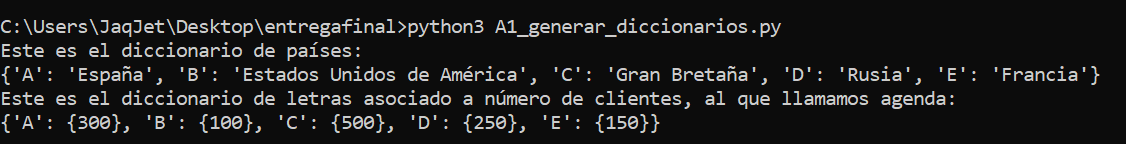
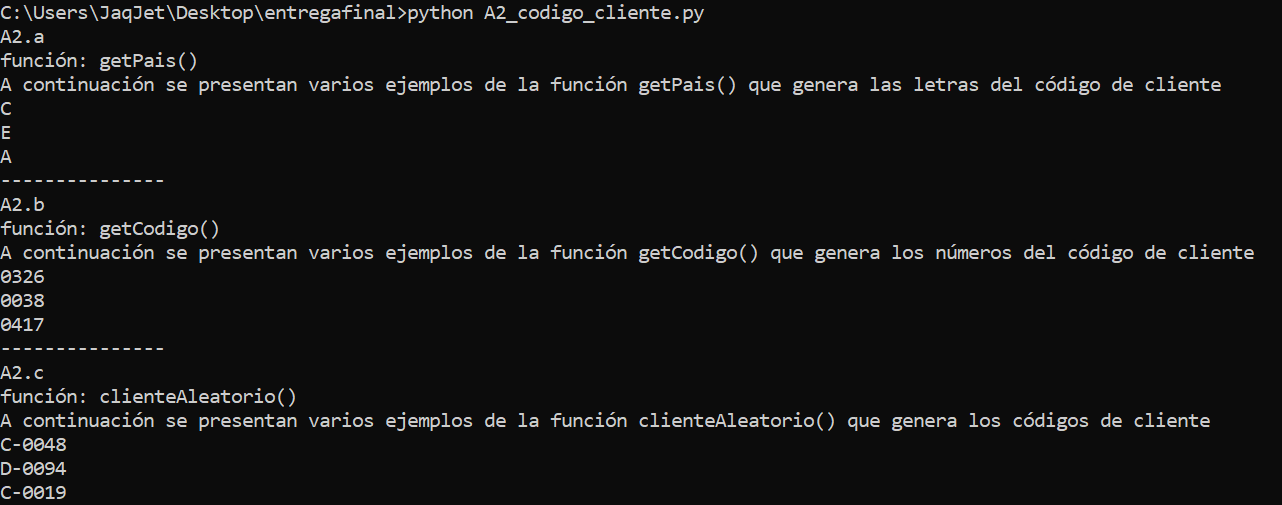
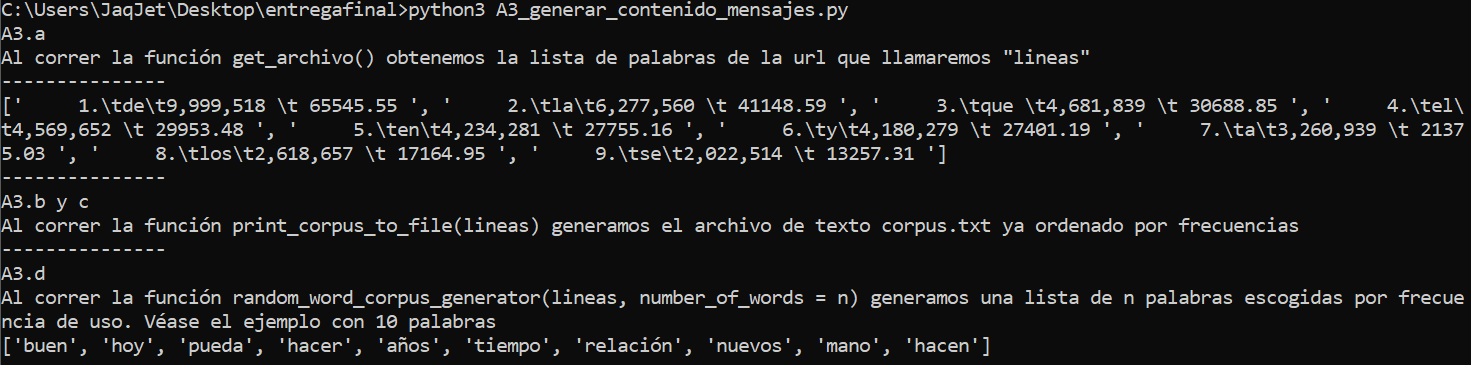
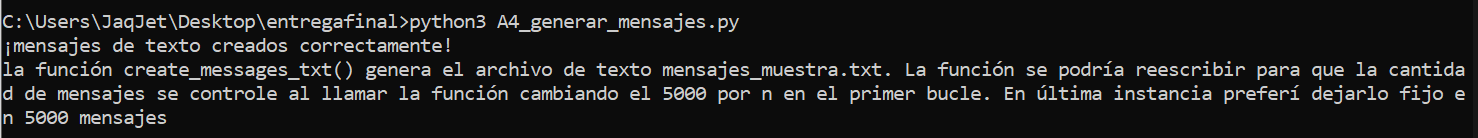
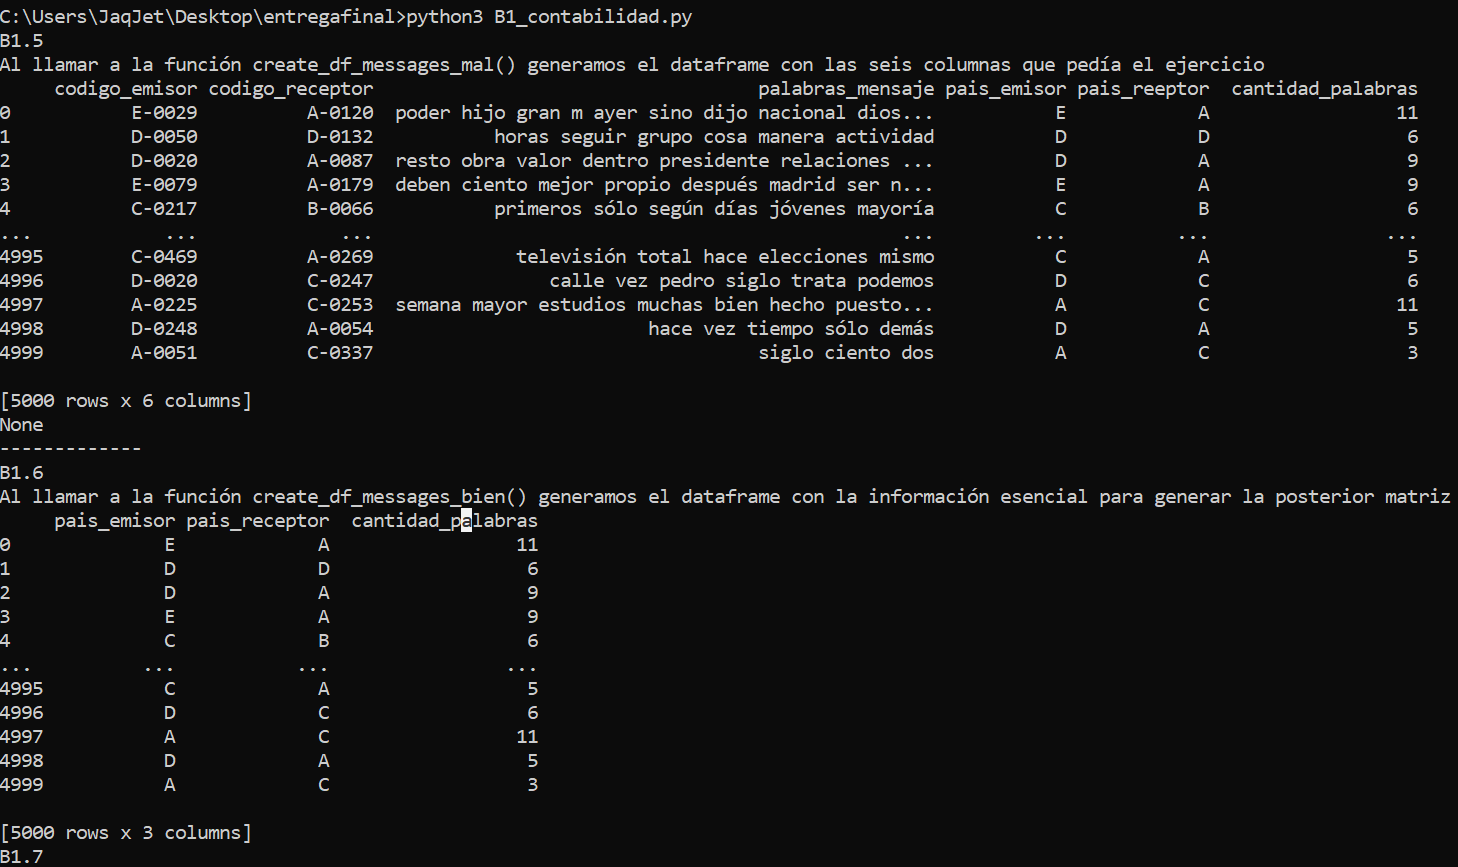
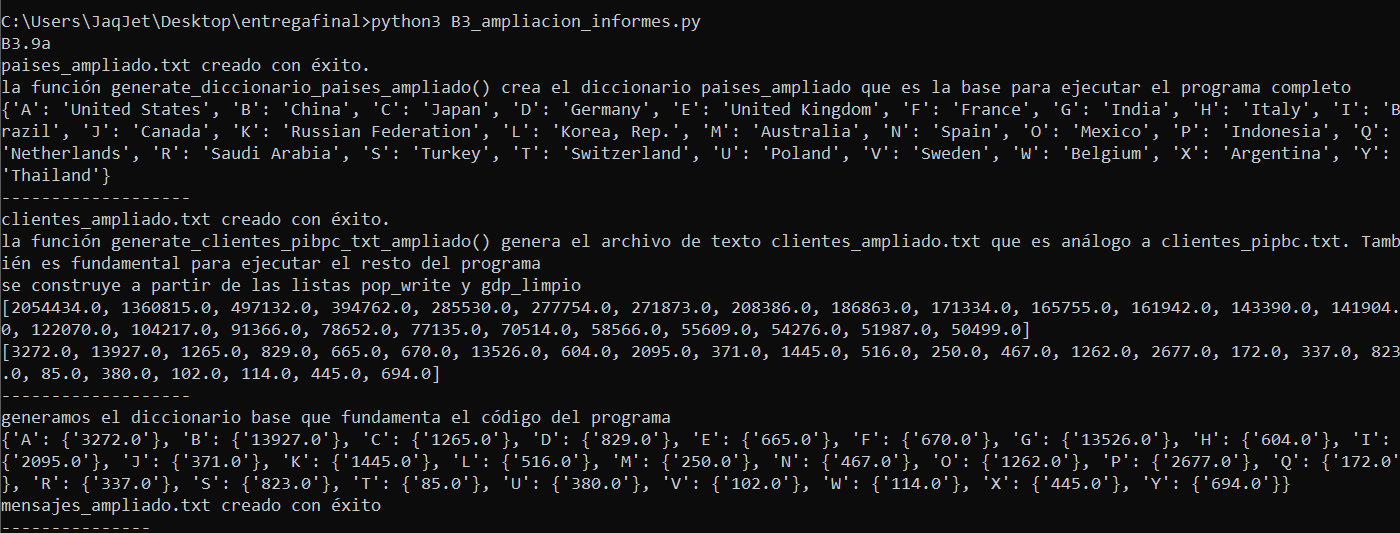
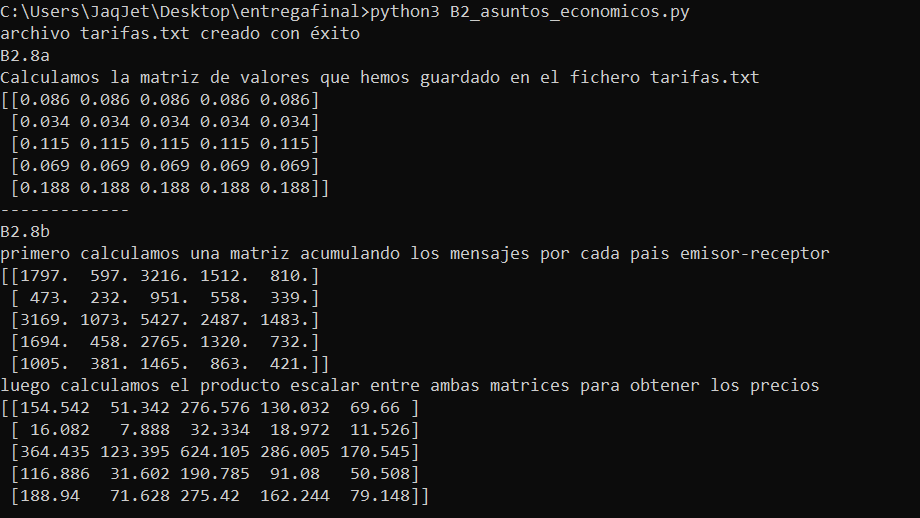